#### Problem statement
Using the UCI PIMA Indian Diabetes dataset to predict a person has diabetes or not using the medical attributes provided.

#### Assumptions

1. This is enough data to split and reliably predict if the patient has diabetes, the dataset has only 786 data points
2. Just these attributes are enough to diagnose the ailment

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

### Data Exploration

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

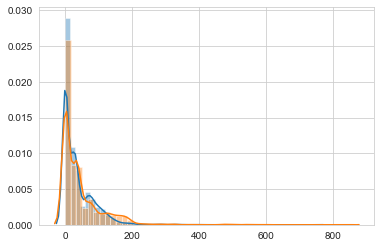

In [6]:
sns.distplot(df[df['Outcome']== 0])
sns.distplot(df[df['Outcome']== 1])

<Figure size 1440x1440 with 0 Axes>

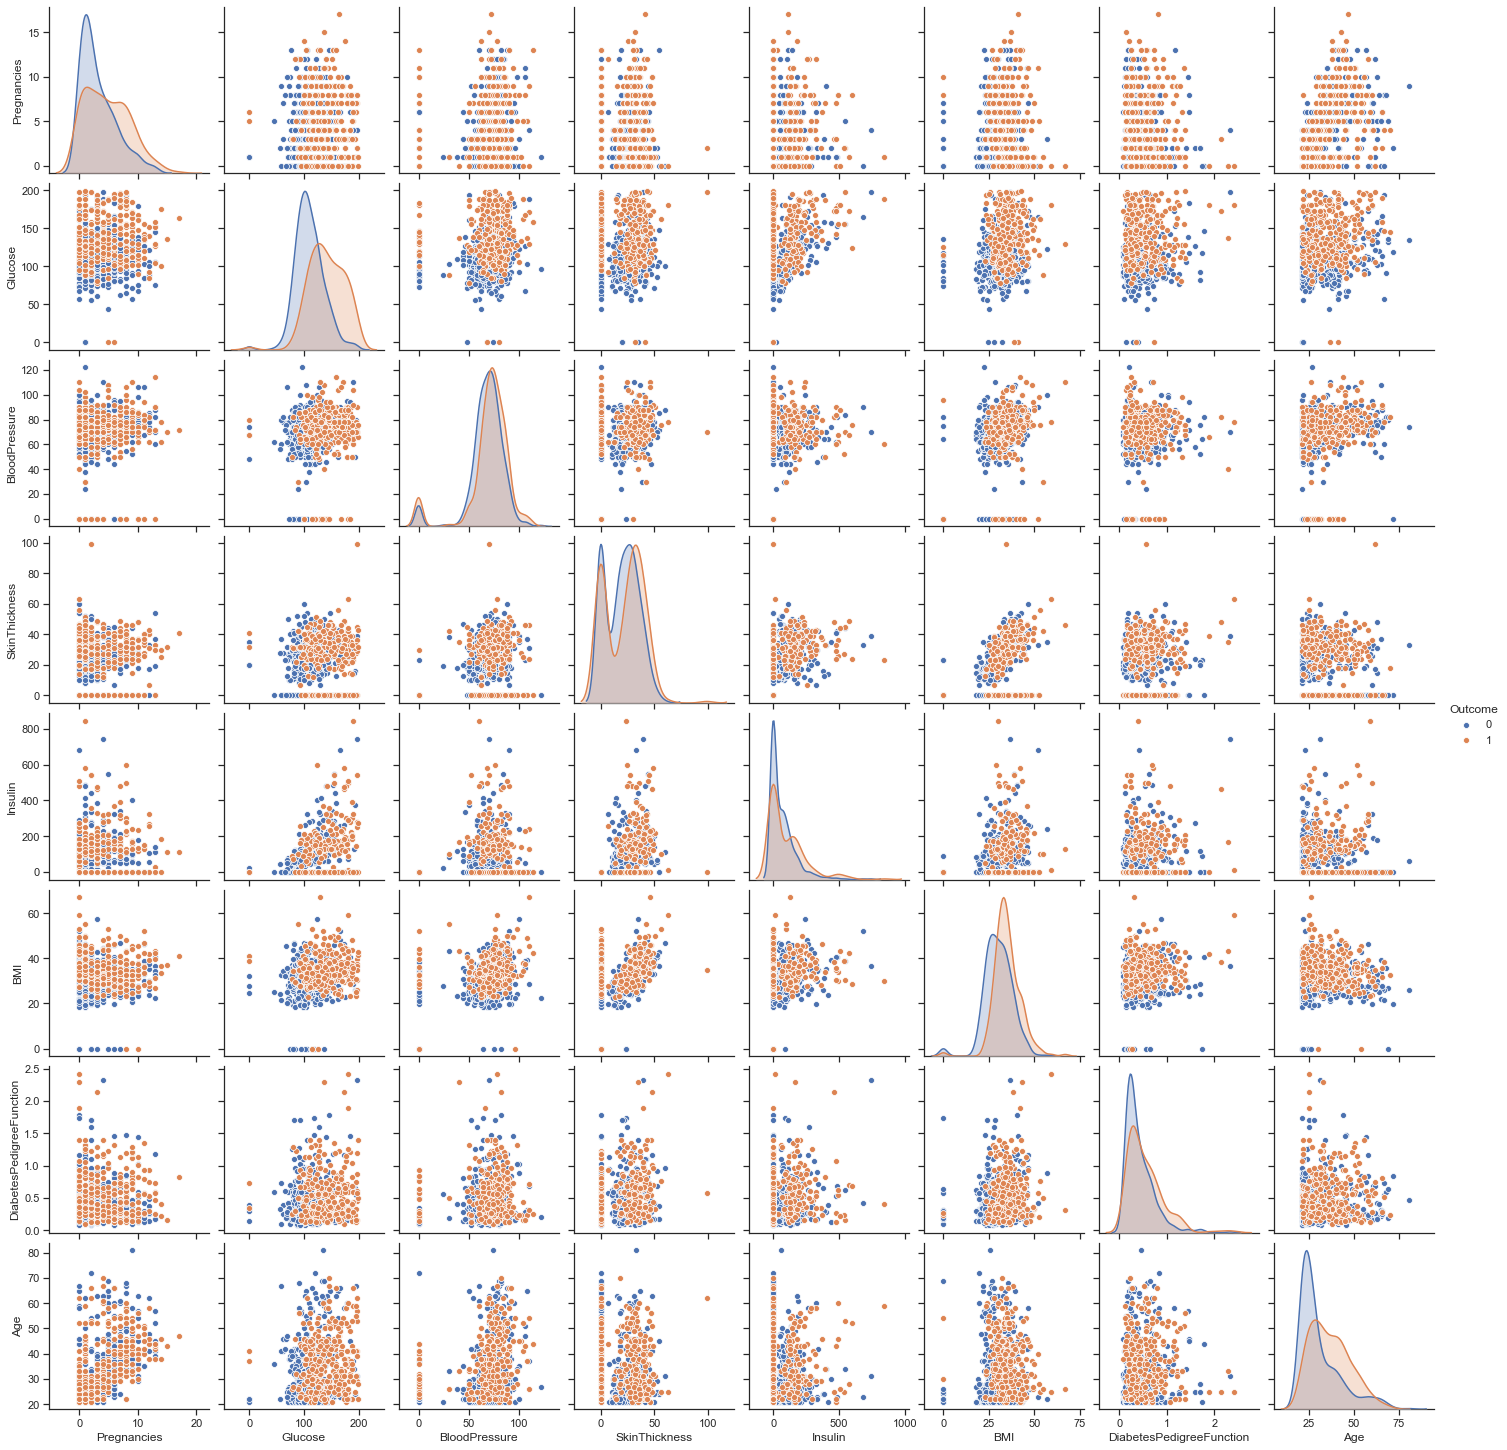

In [7]:
sns.set(style = 'ticks')
plt.figure(figsize = (20, 20))
sns.pairplot(df, hue = 'Outcome')

#### Invalid data
Based on the description above, Plasma glucose levels, blood pressure, skin thickness, insulin and BMI all have min values at 0 which does not pass my smoke test, especially blood pressure, since the diastolic blood pressure most likely cannot be 0 for a living person

In [8]:
print(df[df['BloodPressure'] == 0].shape[0])
print(df[df['BloodPressure'] == 0].index.tolist())
print(df[df['BloodPressure'] == 0].groupby('Outcome')['Age'].count())

35
[7, 15, 49, 60, 78, 81, 172, 193, 222, 261, 266, 269, 300, 332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533, 535, 589, 601, 604, 619, 643, 697, 703, 706]
Outcome
0    19
1    16
Name: Age, dtype: int64


In [9]:
#Plasma glucose levels:
#the range is normally 3.9 to 7.2 for 
#non-diabetic patients even after fasting
print(df[df['Glucose'] == 0].shape[0])
print(df[df['Glucose'] == 0].index.tolist())
print(df[df['Glucose'] == 0].groupby('Outcome')['Age'].count())

5
[75, 182, 342, 349, 502]
Outcome
0    3
1    2
Name: Age, dtype: int64


In [10]:
#for normal healthy adults the skin fold thinkness is not less than 10mm
print(df[df['SkinThickness'] == 0].shape[0])
print(df[df['SkinThickness'] == 0].index.tolist())
print(df[df['SkinThickness'] == 0].groupby('Outcome')['Age'].count())

227
[2, 5, 7, 9, 10, 11, 12, 15, 17, 21, 22, 26, 29, 33, 36, 41, 44, 46, 49, 58, 60, 61, 62, 64, 67, 72, 76, 78, 81, 84, 90, 93, 100, 101, 102, 104, 106, 113, 115, 116, 117, 123, 124, 129, 131, 138, 140, 143, 148, 151, 154, 164, 167, 168, 170, 176, 178, 179, 180, 183, 184, 190, 192, 193, 196, 201, 207, 219, 221, 222, 226, 230, 233, 235, 239, 242, 246, 250, 251, 261, 264, 266, 268, 269, 272, 274, 278, 280, 283, 284, 294, 299, 300, 303, 304, 317, 319, 327, 332, 333, 336, 337, 339, 343, 344, 347, 350, 351, 354, 355, 361, 363, 366, 378, 391, 394, 398, 400, 401, 404, 406, 407, 408, 418, 426, 430, 433, 435, 437, 439, 443, 451, 453, 456, 461, 464, 468, 473, 474, 484, 489, 494, 495, 496, 505, 509, 512, 513, 517, 518, 522, 523, 524, 529, 531, 533, 535, 536, 537, 552, 557, 559, 560, 564, 570, 571, 577, 578, 583, 586, 587, 589, 592, 596, 598, 601, 604, 615, 616, 619, 622, 624, 626, 627, 628, 630, 632, 634, 635, 636, 641, 642, 643, 653, 658, 660, 674, 675, 676, 677, 678, 683, 684, 686, 690, 691, 6

In [11]:
#BMI among adults range from 18.5 to 30.0 or higher
print(df[df['BMI']== 0].shape[0])
print(df[df['BMI']== 0].index.tolist())
print(df[df['BMI']== 0].groupby('Outcome')['Age'].count())

11
[9, 49, 60, 81, 145, 371, 426, 494, 522, 684, 706]
Outcome
0    9
1    2
Name: Age, dtype: int64


Insulin:
Ok, so turns out in some rare cases a person can have zero insulin but they almost definitely have diabetes, which doesn't seem to be the case as per the data since 236 cases have insulin value 0 but are classified to not having diabetes

In [12]:
print(df[df['Insulin']== 0].shape[0])
print(df[df['Insulin']== 0].index.tolist())
print(df[df['Insulin']== 0].groupby('Outcome')['Age'].count())

374
[0, 1, 2, 5, 7, 9, 10, 11, 12, 15, 17, 21, 22, 23, 26, 29, 30, 33, 34, 36, 37, 38, 41, 42, 44, 45, 46, 47, 48, 49, 55, 58, 60, 61, 62, 64, 65, 66, 67, 72, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 86, 89, 90, 93, 96, 100, 101, 102, 104, 106, 113, 115, 116, 117, 118, 121, 123, 124, 129, 131, 133, 138, 140, 141, 143, 145, 146, 148, 149, 151, 154, 155, 160, 163, 164, 166, 167, 168, 170, 172, 176, 178, 179, 180, 183, 184, 185, 190, 192, 193, 194, 196, 200, 201, 202, 205, 207, 209, 210, 211, 212, 218, 219, 221, 222, 226, 227, 230, 233, 235, 237, 238, 239, 240, 242, 245, 246, 249, 250, 251, 253, 255, 256, 257, 261, 262, 263, 264, 266, 267, 268, 269, 270, 272, 274, 276, 278, 280, 283, 284, 294, 299, 300, 303, 304, 310, 314, 317, 319, 321, 322, 324, 327, 330, 332, 333, 336, 337, 339, 342, 343, 344, 347, 349, 350, 351, 352, 354, 355, 357, 361, 362, 363, 366, 367, 378, 381, 386, 387, 391, 394, 397, 398, 399, 400, 401, 403, 404, 406, 407, 408, 410, 416, 417, 418, 423, 426, 430, 433, 434, 435, 4

### Visualizing each measure with respect to the classes


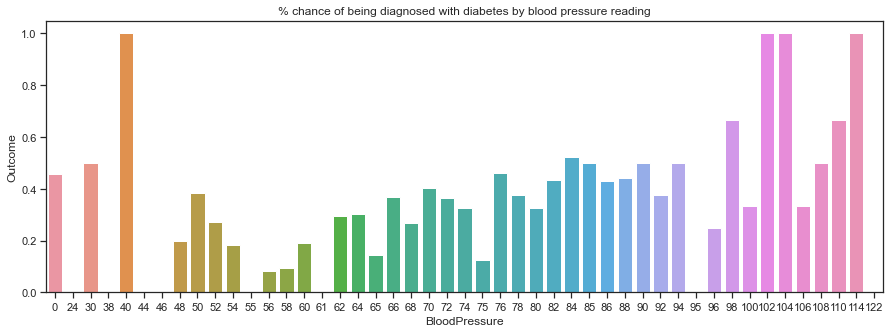

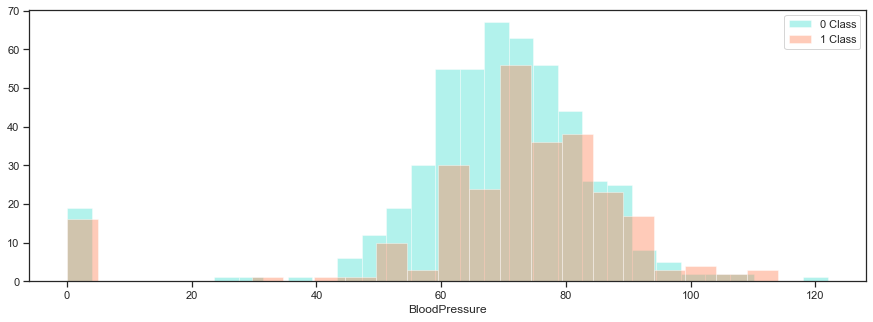

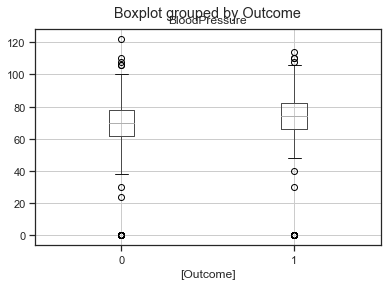

In [13]:
plt.figure(figsize= (15, 5))
bp_pivot = df.groupby('BloodPressure').Outcome.mean().reset_index()
sns.barplot(bp_pivot['BloodPressure'], bp_pivot['Outcome'])
plt.title('% chance of being diagnosed with diabetes by blood pressure reading')
plt.show()

plt.figure(figsize= (15, 5))
sns.distplot(df[df['Outcome'] == 0]['BloodPressure'], color='turquoise', kde=False, label='0 Class')
sns.distplot(df[df['Outcome'] == 1]['BloodPressure'], color='coral', kde=False, label='1 Class')
plt.legend()
plt.show()

df[['BloodPressure', 'Outcome']].boxplot(by= 'Outcome')
plt.show()

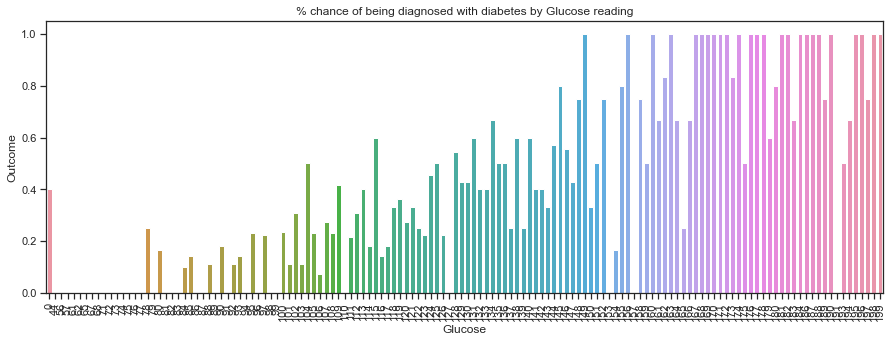

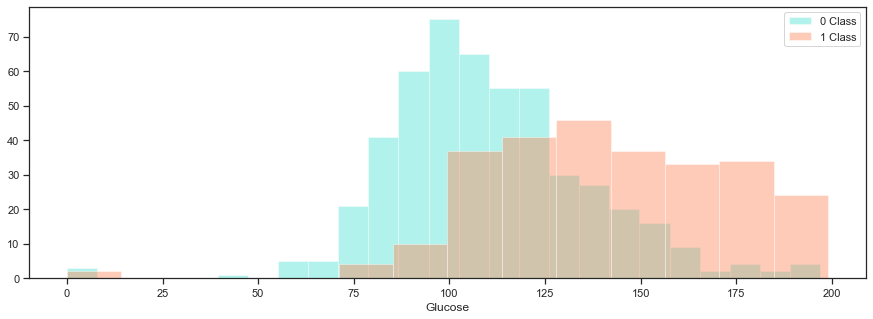

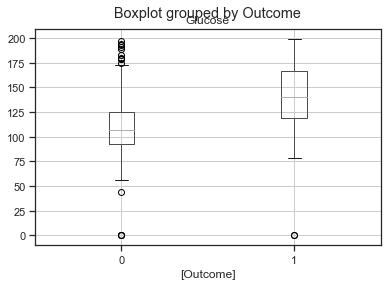

In [14]:
plt.figure(figsize= (15, 5))
glucose_pivot = df.groupby('Glucose').Outcome.mean().reset_index()
sns.barplot(glucose_pivot['Glucose'], glucose_pivot['Outcome'])
plt.title('% chance of being diagnosed with diabetes by Glucose reading')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize= (15, 5))
sns.distplot(df[df['Outcome'] == 0]['Glucose'], color='turquoise', kde=False, label='0 Class')
sns.distplot(df[df['Outcome'] == 1]['Glucose'], color='coral', kde=False, label='1 Class')
plt.legend()
plt.show()

df[['Glucose', 'Outcome']].boxplot(by= 'Outcome')
plt.show()

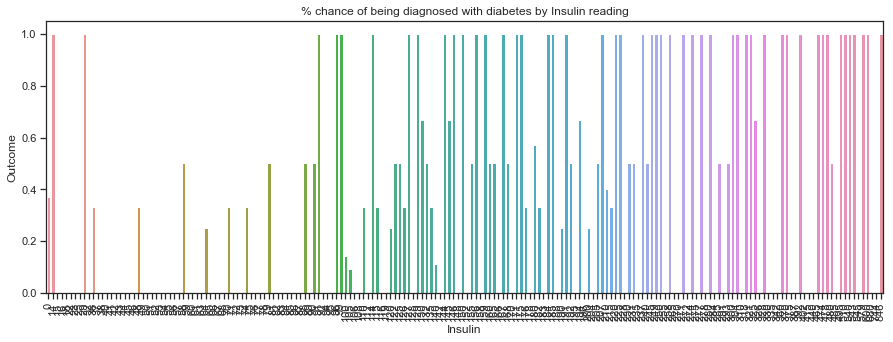

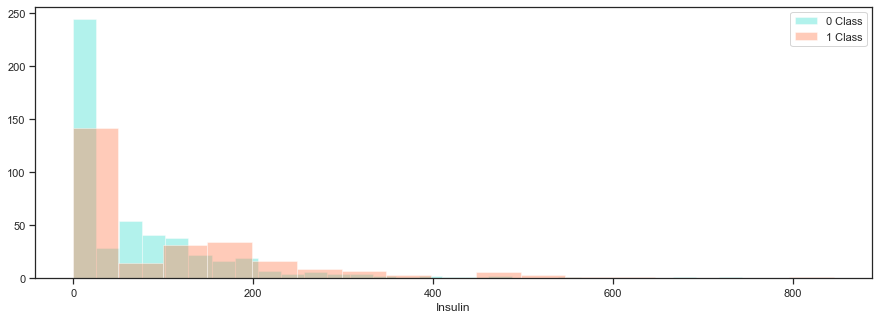

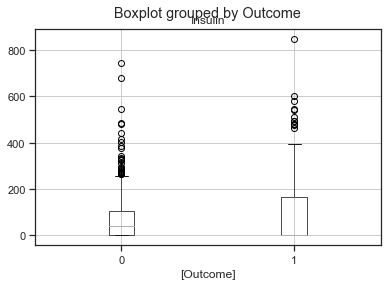

In [15]:
plt.figure(figsize= (15, 5))
insulin_pivot = df.groupby('Insulin').Outcome.mean().reset_index()
sns.barplot(insulin_pivot['Insulin'], insulin_pivot['Outcome'])
plt.title('% chance of being diagnosed with diabetes by Insulin reading')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize= (15, 5))
sns.distplot(df[df['Outcome'] == 0]['Insulin'], color='turquoise', kde=False, label='0 Class')
sns.distplot(df[df['Outcome'] == 1]['Insulin'], color='coral', kde=False, label='1 Class')
plt.legend()
plt.show()

df[['Insulin', 'Outcome']].boxplot(by= 'Outcome')
plt.show()

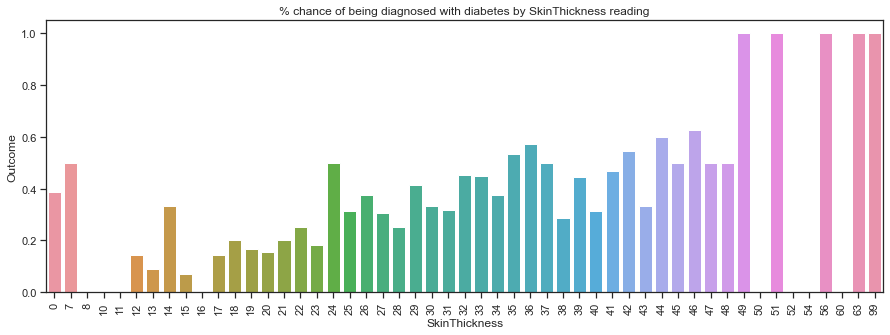

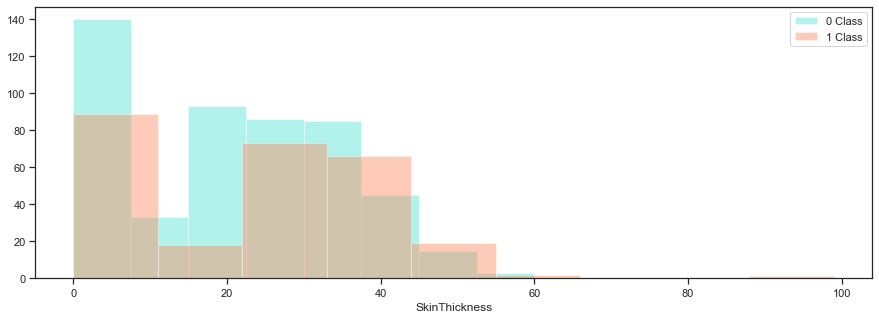

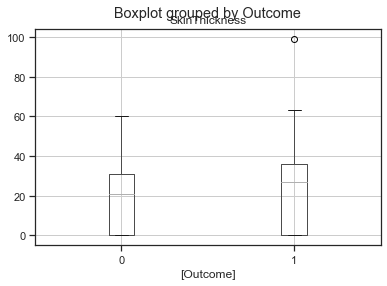

In [16]:
plt.figure(figsize= (15, 5))
SkinThickness_pivot = df.groupby('SkinThickness').Outcome.mean().reset_index()
sns.barplot(SkinThickness_pivot['SkinThickness'], SkinThickness_pivot['Outcome'])
plt.title('% chance of being diagnosed with diabetes by SkinThickness reading')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize= (15, 5))
sns.distplot(df[df['Outcome'] == 0]['SkinThickness'], color='turquoise', kde=False, label='0 Class')
sns.distplot(df[df['Outcome'] == 1]['SkinThickness'], color='coral', kde=False, label='1 Class')
plt.legend()
plt.show()

df[['SkinThickness', 'Outcome']].boxplot(by= 'Outcome')
plt.show()

### Data Selection and Model Fitting

We decide on a data split of 80-20 for train and test sets. 5-fold cross validation of data is used to pick the best classiﬁer for the job that will be used for getting test predictions. 
No outliers are removed at this point. This is based on the assumption that we dont know if there are any outliers at this point and also that we want to use all the data available to model.

In [17]:
from sklearn import linear_model as lm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
data_mod = df[(df.BloodPressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]
train, test = train_test_split(data_mod, test_size = 0.2)
print(data_mod.shape)
print(train.shape)
print(test.shape)

(724, 9)
(579, 9)
(145, 9)


In [19]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'\
            , 'BMI', 'Age', 'Insulin', 'DiabetesPedigreeFunction']

target = 'Outcome'

classifiers = [
    knnc(),
    dtc(),
    SVC(),
    SVC(kernel = 'linear'),
    gnb(),
    rfc()
]

classifier_names = [
    'K nearest neighbors',
    'Decision Tree Classifier',
    'SVM classifier with RBF kernel',
    'SVM classifier with linear kernel',
    'Gaussian Naive Bayes',
    'Random Forest'
]

In [23]:
y_train = train[target].to_frame()
X_features_tr = train[features]

y_test = test[target].to_frame()
X_features_test = test[features]

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('std_scaler', StandardScaler())])

X_train = pipe.fit_transform(X_features_tr)
X_test = pipe.fit_transform(X_features_test)

In [25]:
for clf, clf_name in zip(classifiers, classifier_names):
    cv_score = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    print(clf_name, 'mean accuracy: ', round(cv_score.mean()*100, 3), '% std: ', round(cv_score.var()*100, 3), '%')

K nearest neighbors mean accuracy:  73.58 % std:  0.1 %
Decision Tree Classifier mean accuracy:  71.159 % std:  0.182 %
SVM classifier with RBF kernel mean accuracy:  76.513 % std:  0.158 %
SVM classifier with linear kernel mean accuracy:  77.207 % std:  0.14 %
Gaussian Naive Bayes mean accuracy:  76.346 % std:  0.135 %
Random Forest mean accuracy:  76.859 % std:  0.271 %


In [26]:
for clf, clf_name in zip(classifiers, classifier_names):
    cv_score = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'recall')
    print(clf_name, 'mean recall: ', round(cv_score.mean()*100, 3), '% std: ', round(cv_score.var()*100, 3), '%')

K nearest neighbors mean recall:  52.526 % std:  0.193 %
Decision Tree Classifier mean recall:  60.744 % std:  0.539 %
SVM classifier with RBF kernel mean recall:  55.538 % std:  0.98 %
SVM classifier with linear kernel mean recall:  58.115 % std:  0.782 %
Gaussian Naive Bayes mean recall:  62.192 % std:  0.696 %
Random Forest mean recall:  60.154 % std:  0.781 %


In [27]:
for clf, clf_name in zip(classifiers, classifier_names):
    cv_score = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'precision')
    print(clf_name, 'mean precision: ', round(cv_score.mean()*100, 3), '% std: ', round(cv_score.var()*100, 3), '%')

K nearest neighbors mean precision:  63.88 % std:  0.508 %
Decision Tree Classifier mean precision:  56.179 % std:  0.229 %
SVM classifier with RBF kernel mean precision:  69.182 % std:  0.546 %
SVM classifier with linear kernel mean precision:  69.857 % std:  0.548 %
Gaussian Naive Bayes mean precision:  66.142 % std:  0.456 %
Random Forest mean precision:  67.077 % std:  0.417 %


### Confusion Matrix


K nearest neighbors 
 [[323  60]
 [ 93 103]]


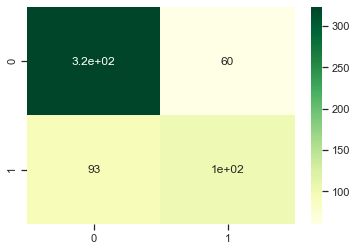

Decision Tree Classifier 
 [[291  92]
 [ 80 116]]


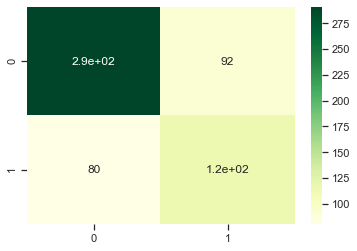

SVM classifier with RBF kernel 
 [[334  49]
 [ 87 109]]


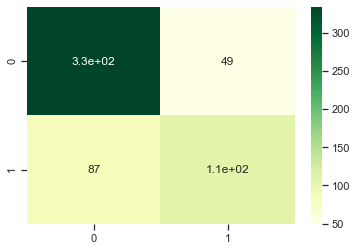

SVM classifier with linear kernel 
 [[333  50]
 [ 82 114]]


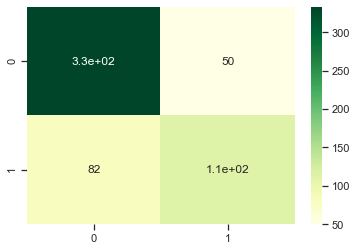

Gaussian Naive Bayes 
 [[320  63]
 [ 74 122]]


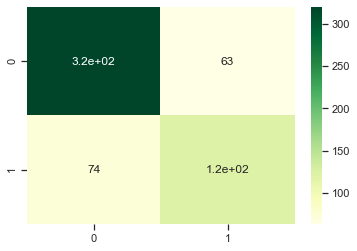

Random Forest 
 [[332  51]
 [ 79 117]]


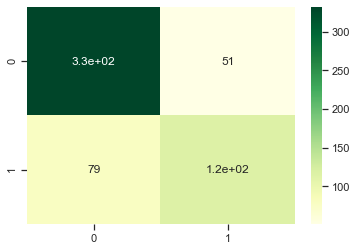

In [28]:
from sklearn.model_selection import cross_val_predict
for clf, clf_name in zip(classifiers, classifier_names):
    y_train_pred = cross_val_predict(clf, X_train, y_train, cv = 5)
    print(clf_name, '\n', confusion_matrix(train[target], y_train_pred))
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, cmap="YlGn")
    plt.show()

I've decided to continue with SVC(), SVC(kernel= 'linear') and RandomForest classifiers.


In [47]:
from sklearn.model_selection import GridSearchCV

#SVM classifier with RBF kernel
param_grid = [{'gamma':[0.001, 0.01, 0.1, 1, 10],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
rbf_kernel_svm_clf = SVC(kernel='rbf')
grid_search = GridSearchCV(rbf_kernel_svm_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [55]:
final_model_svm = SVC(kernel = 'rbf', 
                     gamma = 0.01,
                     C = 10)
y_train_pred_svc = cross_val_predict(final_model_svm, X_train, y_train, cv = 5)

In [56]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision_score: ', round(precision_score(y_train, y_train_pred_svc)* 100, 2), '%'\
      '\nRecall_score:    ', round(recall_score(y_train, y_train_pred_svc)* 100, 2), '%' \
     '\nAccuracy_score:  ', round(accuracy_score(y_train, y_train_pred_svc)* 100, 2),'%', 
     '\nF1_score:        ', round(f1_score(y_train, y_train_pred_svc)* 100, 2),'%') 

Precision_score:  71.62 %
Recall_score:     54.08 %
Accuracy_score:   77.2 % 
F1_score:         61.63 %


In [63]:
#Random Forest classifier

param_grid = [{'n_estimators': [3, 10, 25, 30, 35], 
               'max_features': [2, 4, 5, 10], 
               'max_depth': [10, 50, None], 
               'bootstrap': [True, False]}]
    
    
    
rf_clf = rfc()
grid_search = GridSearchCV(rf_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'bootstrap': True, 'max_depth': None, 'max_features': 2, 'n_estimators': 25}

In [68]:
#Random Forest classifier
final_model_rfc = rfc()
y_train_pred_rfc = cross_val_predict(final_model_rfc, X_train, y_train, cv = 5)

In [69]:
print('Precision_score: ', round(precision_score(y_train, y_train_pred_rfc)* 100, 2), '%'\
      '\nRecall_score:    ', round(recall_score(y_train, y_train_pred_rfc)* 100, 2), '%' \
     '\nAccuracy_score:  ', round(accuracy_score(y_train, y_train_pred_rfc)* 100, 2),'%', 
     '\nF1_score:        ', round(f1_score(y_train, y_train_pred_rfc)* 100, 2),'%') 

Precision_score:  68.86 %
Recall_score:     58.67 %
Accuracy_score:   77.03 % 
F1_score:         63.36 %


In [70]:
#SVM classifier with linear kernel
param_grid = [{'gamma':[0.001, 0.01, 0.1, 1, 10],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
lin_kernel_svm_clf = SVC(kernel='linear')
grid_search = GridSearchCV(lin_kernel_svm_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'C': 0.1, 'gamma': 0.001}

In [71]:
#SVM classifier with linear kernel
final_model_svm_lin = SVC(kernel = 'linear', gamma = 0.001, C = 0.1)
y_train_pred_svc_lin = cross_val_predict(final_model_svm_lin, X_train, y_train, cv = 5)

In [72]:
print('Precision_score: ', round(precision_score(y_train, y_train_pred_svc_lin)* 100, 2), '%'\
      '\nRecall_score:    ', round(recall_score(y_train, y_train_pred_svc_lin)* 100, 2), '%' \
     '\nAccuracy_score:  ', round(accuracy_score(y_train, y_train_pred_svc_lin)* 100, 2),'%', 
     '\nF1_score:        ', round(f1_score(y_train, y_train_pred_svc_lin)* 100, 2),'%') 

Precision_score:  70.37 %
Recall_score:     58.16 %
Accuracy_score:   77.55 % 
F1_score:         63.69 %


In [73]:
final_model_svm = SVC().fit(X_train, y_train)
final_model_svm_lin = SVC(kernel = 'linear').fit(X_train, y_train)
final_model_rfc = rfc().fit(X_train, y_train)

In [74]:
y_hat_svm = final_model_svm.predict(X_test)
y_hat_svm_lin = final_model_svm_lin.predict(X_test)
y_hat_rfc = final_model_rfc.predict(X_test)

Test accuracy for SVM classifier with linear kernel:  72.41 %


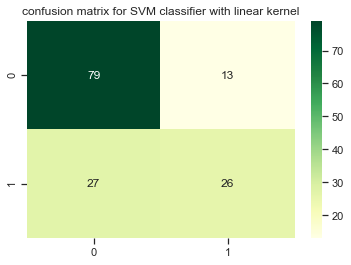

Test accuracy for SVM classifier with RBF kernel:  70.34 %


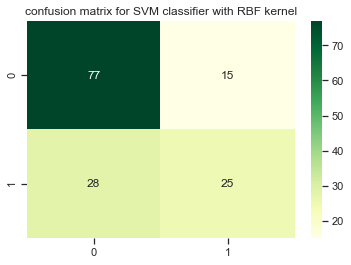

Test accuracy for Random Forest classifier:  71.72 %


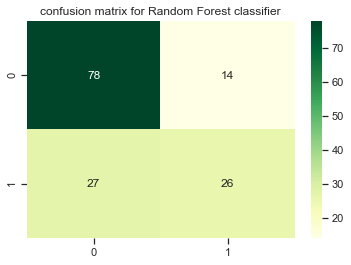

In [75]:
print('Test accuracy for SVM classifier with linear kernel: ', 
     round(accuracy_score(y_test, y_hat_svm_lin) * 100, 2), '%')
plt.title('confusion matrix for SVM classifier with linear kernel')
sns.heatmap(confusion_matrix(y_test, y_hat_svm_lin), annot=True, cmap="YlGn")
plt.show()

print('Test accuracy for SVM classifier with RBF kernel: ', 
     round(accuracy_score(y_test, y_hat_svm) * 100, 2), '%')
plt.title('confusion matrix for SVM classifier with RBF kernel')
sns.heatmap(confusion_matrix(y_test, y_hat_svm), annot=True, cmap="YlGn")
plt.show()

print('Test accuracy for Random Forest classifier: ', 
     round(accuracy_score(y_test, y_hat_rfc) * 100, 2), '%')
plt.title('confusion matrix for Random Forest classifier')
sns.heatmap(confusion_matrix(y_test, y_hat_rfc), annot=True, cmap="YlGn")
plt.show()

### Observations

The SVM linear model does seem to do much better from an accuracy perspective for the data. It also has fewer false positives than the Naive Bayes model, but higher true negative predictions.

### ROC curve
The ROC curve shows false positive rate (FPR) against the true positive rate (TPR).

In [38]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')

In [39]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

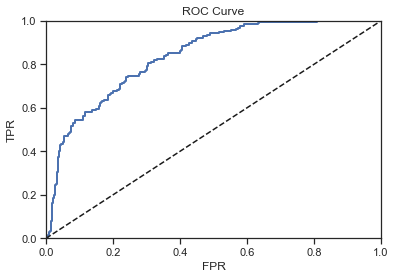

AUC for SVM classifier with linear kernel:  83.78 %


In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# ROC curve SVM classifier with linear kernel
y_scores_svm_lin = cross_val_predict(final_model_svm_lin,
                                     X_train, 
                                     y_train.values.ravel(), 
                                     cv = 5, 
                                     method = 'decision_function')

fpr, tpr, thresholds = roc_curve(y_train, y_scores_svm_lin)
    
plot_roc_curve(fpr, tpr)
plt.show()

print('AUC for SVM classifier with linear kernel: ', round(roc_auc_score(y_train, y_scores_svm_lin)* 100, 2),'%')

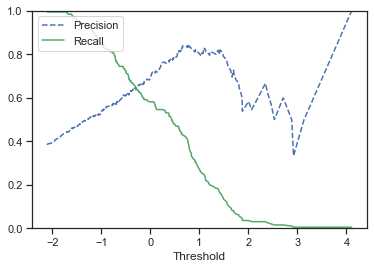

In [77]:
from sklearn.metrics import precision_recall_curve
#precision recall curve for SVM classifier with linear kernel
precision, recall, threshold = precision_recall_curve(y_train, y_scores_svm_lin)

plot_precision_recall_vs_threshold(precision, recall, threshold)
plt.show()

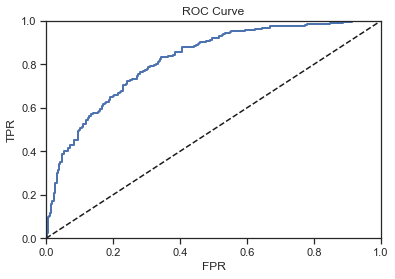

AUC for SVM classifier with RBF kernel:  82.07 %


In [42]:
# ROC curve SVM classifier with RBF kernel
y_scores_svm = cross_val_predict(final_model_svm,
                                     X_train, 
                                     y_train.values.ravel(), 
                                     cv = 5, 
                                     method = 'decision_function')

fpr, tpr, thresholds = roc_curve(y_train, y_scores_svm)
    
plot_roc_curve(fpr, tpr)
plt.show()

print('AUC for SVM classifier with RBF kernel: ', round(roc_auc_score(y_train, y_scores_svm)* 100, 2),'%')

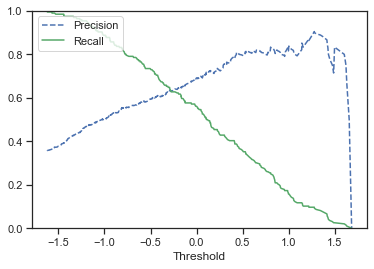

In [43]:
#precision recall curve for SVM classifier with RBF kernel
precision, recall, threshold = precision_recall_curve(y_train, y_scores_svm)

plot_precision_recall_vs_threshold(precision, recall, threshold)
plt.show()

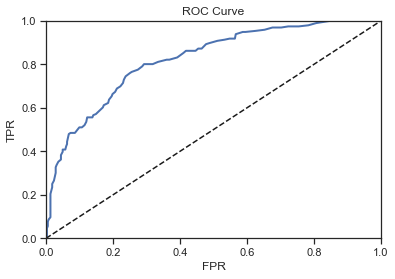

AUC for RF classifier :  82.29 %


In [44]:
# ROC curve RF classifier
y_scores_rfc = cross_val_predict(final_model_rfc,
                                 X_train, 
                                 y_train.values.ravel(), 
                                 cv = 5, 
                                 method= 'predict_proba')  
                                    
y_scores_rfc = y_scores_rfc[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_scores_rfc)
    
plot_roc_curve(fpr, tpr)
plt.show()

print('AUC for RF classifier : ', round(roc_auc_score(y_train, y_scores_rfc)* 100, 2),'%')

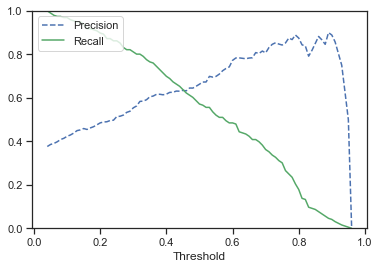

In [45]:
#precision recall curve for RF classifier
precision, recall, threshold = precision_recall_curve(y_train, y_scores_rfc)

plot_precision_recall_vs_threshold(precision, recall, threshold)
plt.show()